<a href="https://colab.research.google.com/github/rafaelrlima/aula7_rede_neural-densa/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSI5796 Lição de casa Fashion_MNIST

In [ ]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import matplotlib.pyplot as plt


Carregando Fashion MNIST


In [ ]:
(AX, AY), (QX, QY) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
AX=255-AX; QX=255-QX
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28

AX = AX.astype('float32') / 255.0 # 0 a 1
QX = QX.astype('float32') / 255.0 # 0 a 1

model = Sequential()
model.add(Flatten(input_shape=(nl,nc)))
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

opt=optimizers.Adam()
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])



Treinando o Modelo

In [ ]:
model.fit(AX, AY2, 
          batch_size=100, 
          epochs=10, 
          verbose=True);

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 2.3395 - accuracy: 0.0958
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3032 - accuracy: 0.0976
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0994
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1011
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0969
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0967
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0997
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0989

Avaliação da acurácia do modelo


In [ ]:
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#model.save('mlp2.h5')


Test loss: 2.302597999572754
Test accuracy: 0.10000000149011612


Predições

In [ ]:
predictions = model.predict(QX)
predictions[0]

array([0.10021754, 0.09868813, 0.09974266, 0.10012274, 0.1001301 ,
       0.09924494, 0.10111792, 0.10070762, 0.10039587, 0.09963251],
      dtype=float32)

Plotando as Predições

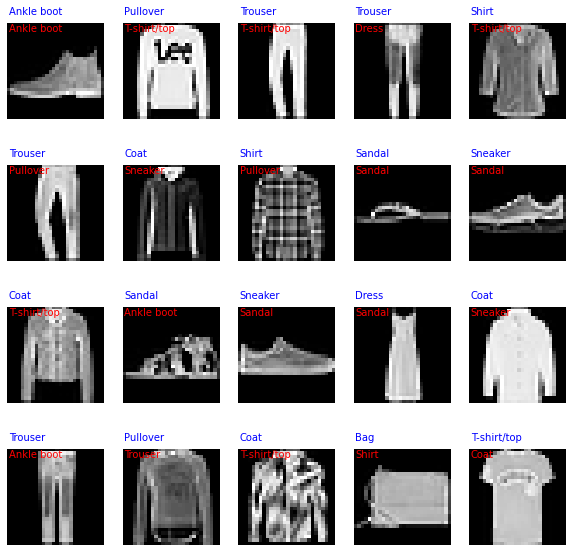

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

f = plt.figure(figsize=(10,10))
for i in range(20):
  f.add_subplot(4,5,i+1)
  plt.imshow(QX[i], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.axis("off");
  plt.text(0,-3,class_names[QY[i]],color="b")
  plt.text(0, 2,class_names[AY[i]],color="r")
  #plt.savefig("nome_imagem.png")
plt.show()
